**Author : Barkha Verma**

**Data Science and Business Analytics internship**

**The Sparks Foundation GRIP**

**Batch : December 2020**

**Task#2 Find the optimal number of clusters in given Iris dataset.**

**Unsupervised Machine Learning**


**K-Means Clustering**


In [38]:
# First we will import the important libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
plt.style.use('default')


In [59]:
# We will import the iris dataset
data = pd.read_csv("Iris.csv")
# we will print the first five line of our dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
# we will check if there is any NAN value in our dataset or not
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

From above we can see that there is no NAN value

In [41]:
# we will check the shape of our dataset
data.shape

(150, 6)

From above we can see that there is 150 rows and 6 columns

In [42]:
# We will print name of all columns present in our dataset.
data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [43]:
# here we are showing how many examples we have of each species
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [44]:
# we will print the info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
# we will print the summary of our dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Finding Correlation**

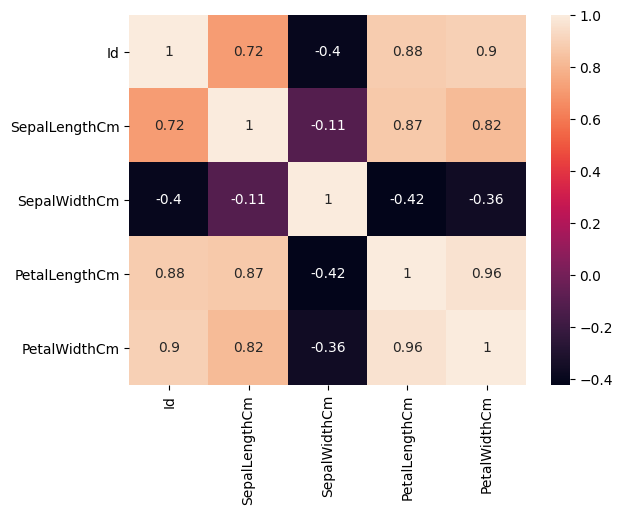

In [46]:
# we will find correlation between the dataset
corrMatrix=data.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

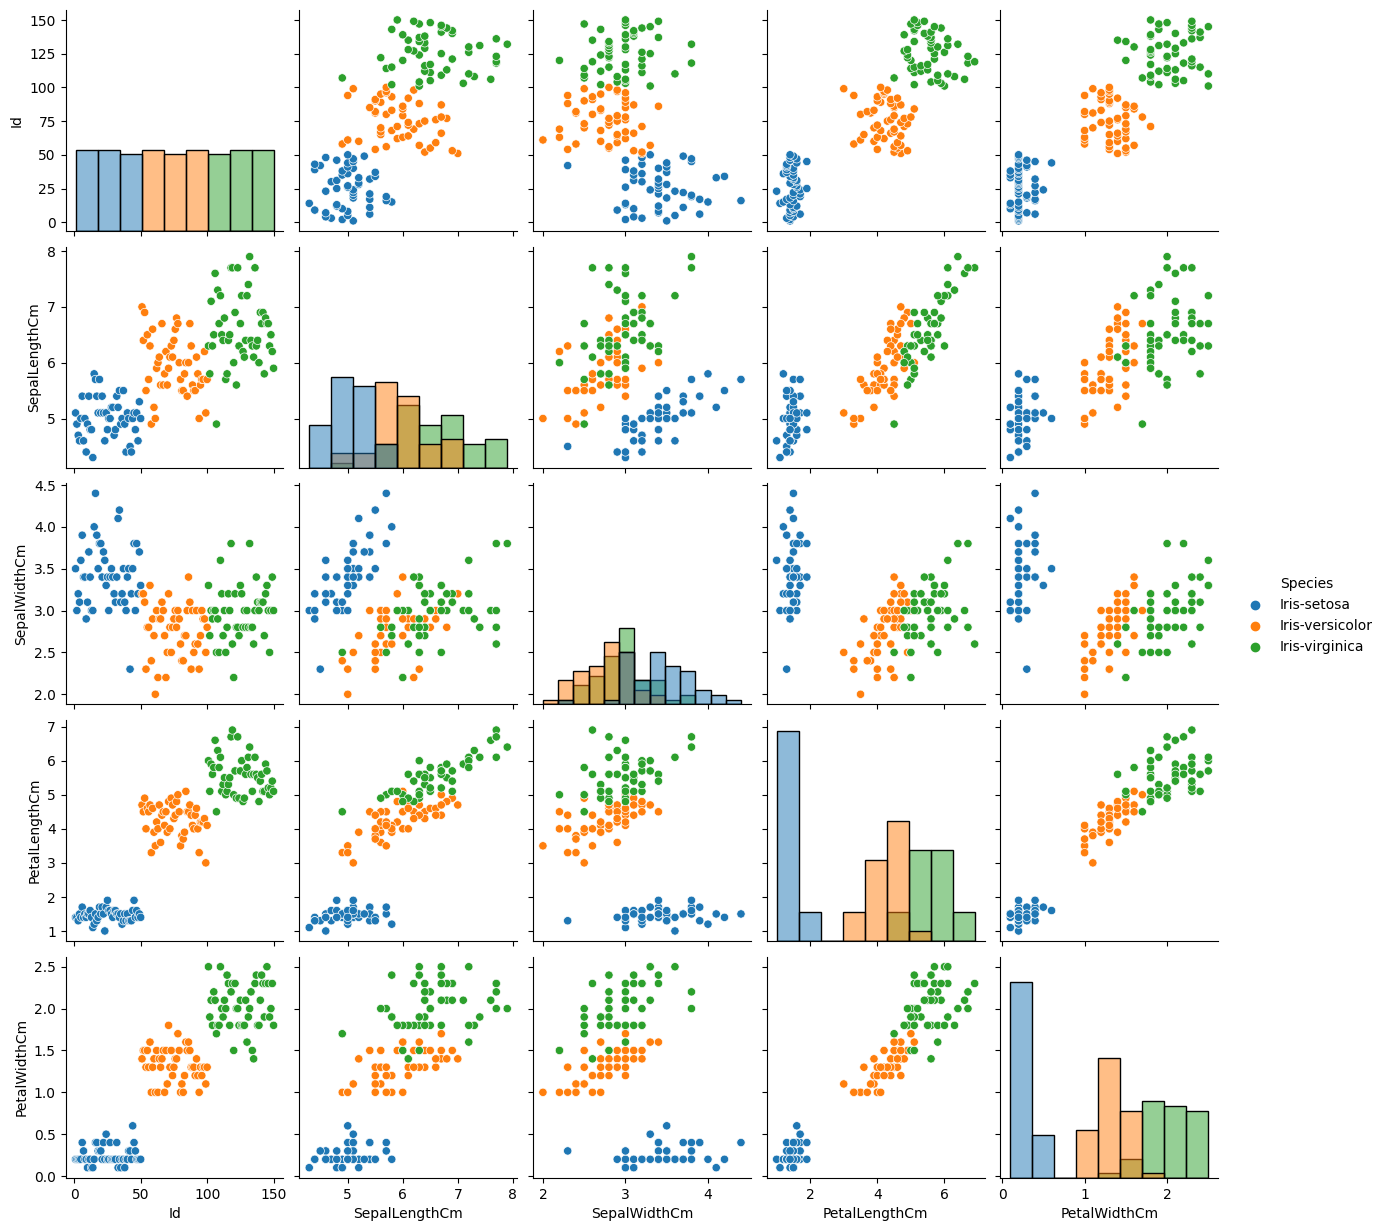

In [47]:
# we will plot pairplot which will shows the bivariate relation between each pair of features of our dataset
sns.pairplot(data, hue="Species", diag_kind="hist")
plt.show()

Now to determine the number of cluster, let's use elbow method. I'll get all the length and width values, and then initialize an empty array for the sum of squared errors, what we need to calculate.I'll then assume a max of 11 clusters, and use the KMeans function to cluster the data in 'k' groups, minimizing the inertia, the sum-of-squares criterion. Next, I'll append the inertia to the sum_squared_errors list.

I'll then plot sum_squared_errors, and look for a bend in the chart, hence the "Elbow" method, as it looks like a bend in the elbow. I'll categorize this as the point where the dataset no longer decreases by a significant amount.

In [62]:
# We will divide the data into attribute
x = data.iloc[:,[1,2,3,4]].values

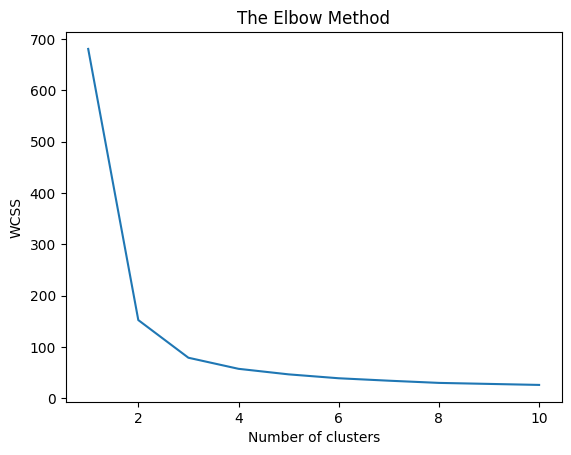

In [71]:
# Cluster-Sum-of-Squares (wcss)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
# we will plot the graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above we can see that elbow has occured where the number of clusters is 3.

**Training the kmeans model on our dataset**

In [72]:
kmeans= KMeans(n_clusters=3,init="k-means++",max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [73]:
# We will print the centers of clusters
centers = kmeans.cluster_centers_
centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

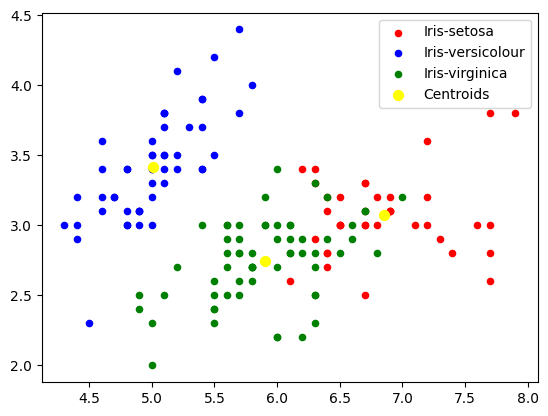

In [78]:
# We will plot the clusters on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 20, c = 'green', label = 'Iris-virginica')

# here we are plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 50, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()